In [ ]:
# this notebook creates case_ara_levels.json from 'ctx_sc_cases_clean.csv
# the json file contains mappings case_id: { ara_level: case_side}
# should be executed on machine with access to ini storage cluster

In [1]:
import os
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sc_util import sc_levels
from parse_case_sheet import get_clean_df
%matplotlib inline

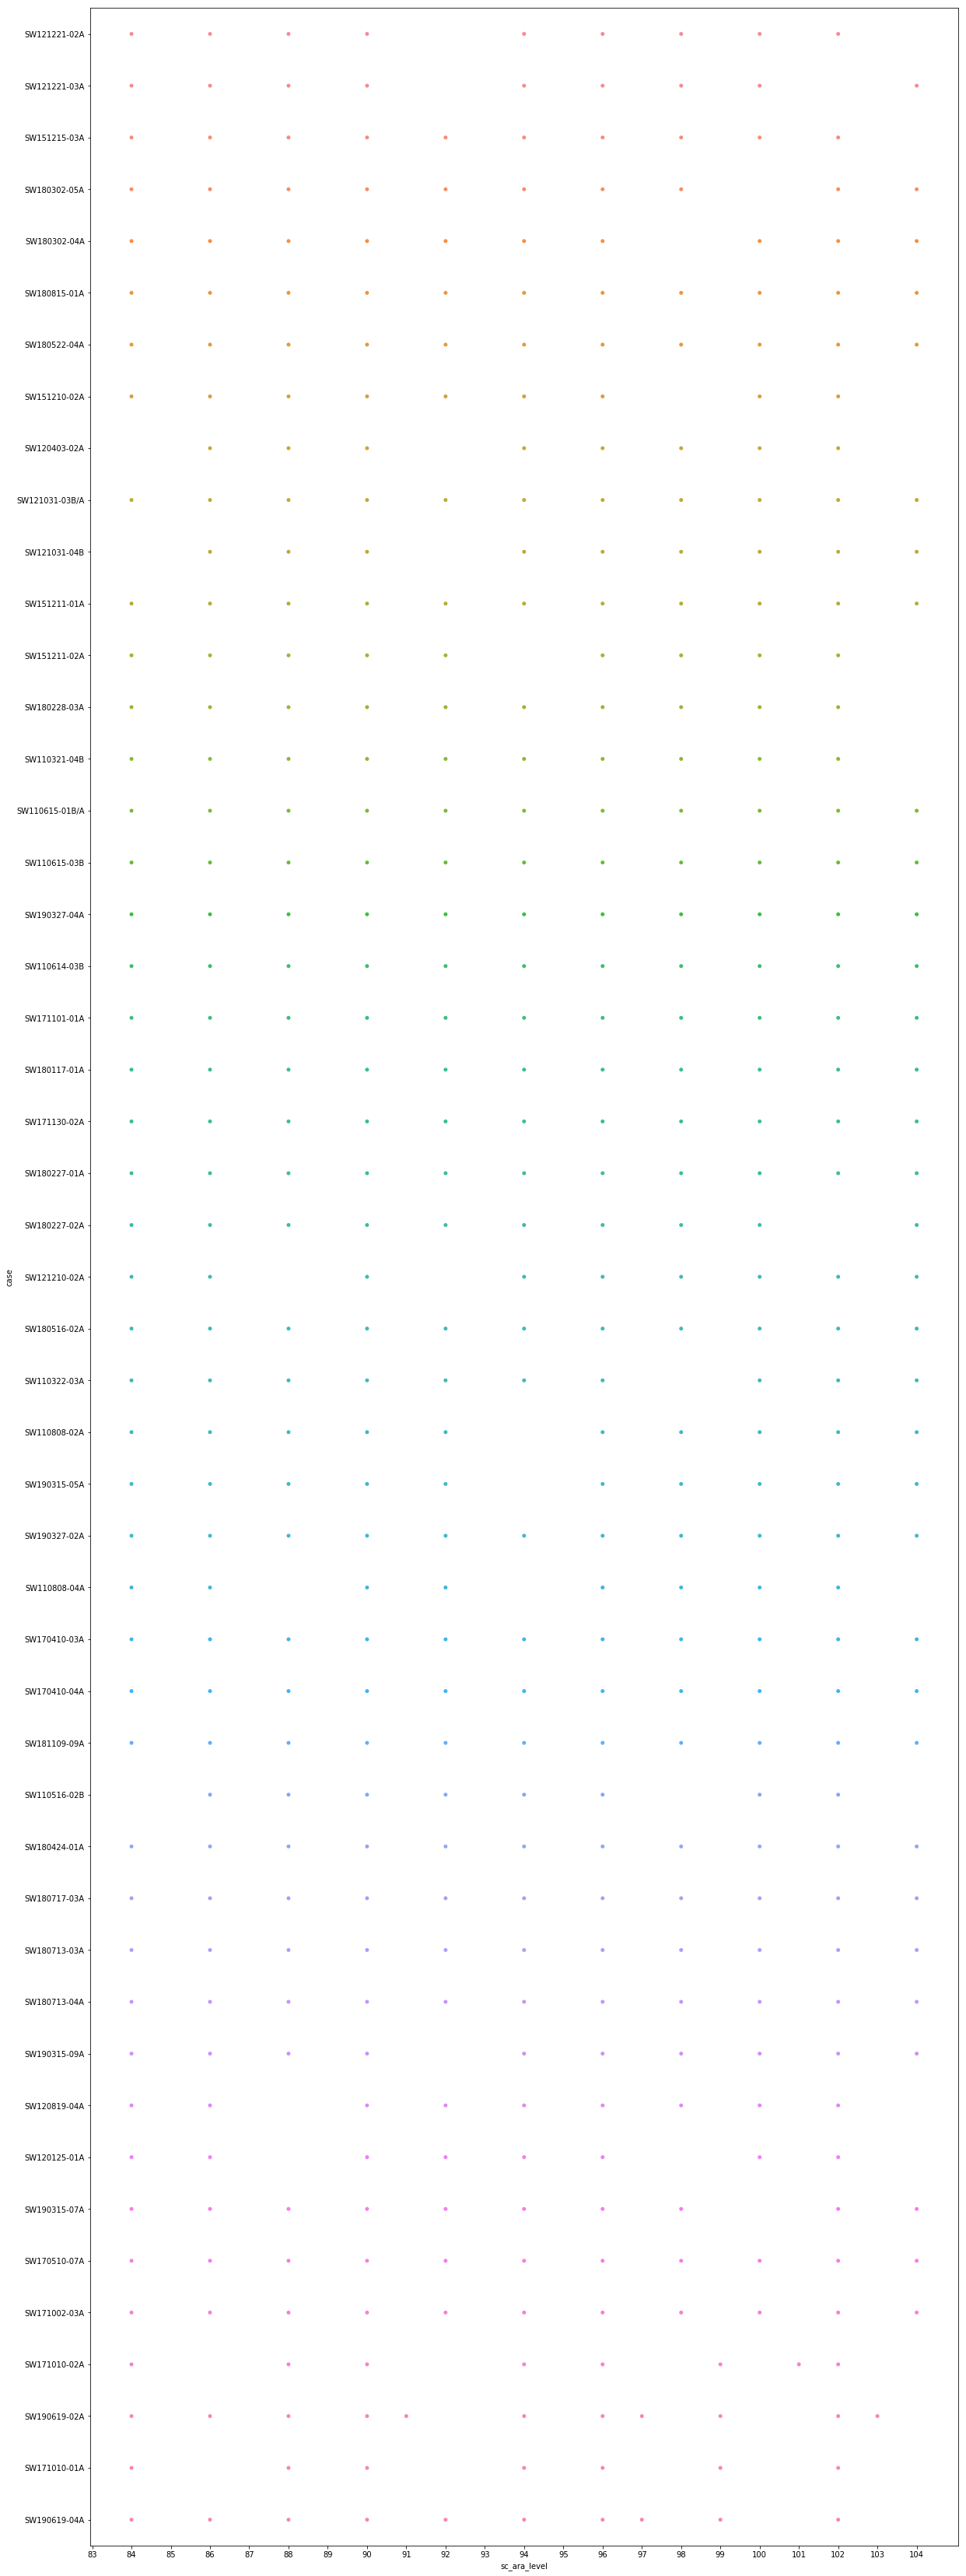

In [19]:
df_levels = []
with open('case_ara_levels.json', 'r') as f:
    case_ara_levels = json.load(f)
for case in case_ara_levels:
    df_level = pd.DataFrame({
        'case': case,
        'sc_ara_level': [int(ara_level) for ara_level in case_ara_levels[case].keys() if int(ara_level) in sc_levels] 
    })
    df_levels.append(df_level)
df_levels = pd.concat(df_levels)
fig, ax = plt.subplots(figsize=(20, 60))
sns.stripplot(x='sc_ara_level', y='case', data=df_levels, jitter=False, ax=ax)
_ = ax.set_xticks(sorted(list(sc_levels)))    